In [1]:
import sys
import os
copypath = ['../modules', 
            '../Train', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python27.zip', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/plat-linux2', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-tk', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-old', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-dynload', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages', 
            '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg']
for p in reversed(copypath):
    sys.path.insert(0, p)
print sys.path
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['DEEPJET'] = '../../DeepJet'
#os.environ['LD_LIBRARY_PATH'] = '../modules:%s'%os.environ['LD_LIBRARY_PATH']
#os.environ['PATH'] = '../scripts:%s'%os.environ['PATH']
#os.environ['CONDA_PREFIX'] = '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu'
#os.environ['LD_PRELOAD'] = '%s/lib/libmkl_core.so:%s/lib/libmkl_sequential.so'%(os.environ['CONDA_PREFIX'],os.environ['CONDA_PREFIX'])
import keras
keras.backend.set_image_data_format('channels_first')

['../modules', '../Train', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python27.zip', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/plat-linux2', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-tk', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-old', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/lib-dynload', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages', '/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg', '', '/opt/conda/envs/python2/lib/python27.zip', '/opt/conda/envs/python2/lib/python2.7', '/opt/conda/envs/python2/lib/python2.7/plat-linux2', '/opt/conda/envs/python2/lib/python2.7/li

Using TensorFlow backend.


In [2]:
!nvidia-smi

Thu Aug 31 03:06:06 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.66                 Driver Version: 375.66                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:04:00.0     Off |                  N/A |
| 27%   34C    P8     9W / 180W |   7781MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 0000:05:00.0     Off |                  N/A |
| 27%   33C    P8     9W / 180W |   7781MiB /  8114MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
from keras.models import load_model
from testing import testDescriptor
from argparse import ArgumentParser
from keras import backend as K
from Losses import * #needed!
import os
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from root_numpy import array2root
import pandas as pd

In [4]:
def makePlots(traind, outputDir):

    print 'in makePlots()'
    
    # let's use only first 10k entries
    NENT = 10000
    features_val=[fval[:NENT] for fval in traind.getAllFeatures()]
    labels_val=traind.getAllLabels()[0][:NENT,:]
    weights_val=traind.getAllWeights()[0][:NENT]
    spectators_val = traind.getAllSpectators()[0][:NENT,0,:]
    
    print features_val[0].shape
    print features_val[1].shape
    print spectators_val.shape
    print weights_val.shape
    print labels_val.shape
    
    db_columns = ['fj_jetNTracks',
                          'fj_nSV',
                          'fj_tau0_trackEtaRel_0',
                          'fj_tau0_trackEtaRel_1',
                          'fj_tau0_trackEtaRel_2',
                          'fj_tau1_trackEtaRel_0',
                          'fj_tau1_trackEtaRel_1',
                          'fj_tau1_trackEtaRel_2',
                          'fj_tau_flightDistance2dSig_0',
                          'fj_tau_flightDistance2dSig_1',
                          'fj_tau_vertexDeltaR_0',
                          'fj_tau_vertexEnergyRatio_0',
                          'fj_tau_vertexEnergyRatio_1',
                          'fj_tau_vertexMass_0',
                          'fj_tau_vertexMass_1',
                          'fj_trackSip2dSigAboveBottom_0',
                          'fj_trackSip2dSigAboveBottom_1',
                          'fj_trackSip2dSigAboveCharm_0',
                          'fj_trackSipdSig_0',
                          'fj_trackSipdSig_0_0',
                          'fj_trackSipdSig_0_1',
                          'fj_trackSipdSig_1',
                          'fj_trackSipdSig_1_0',
                          'fj_trackSipdSig_1_1',
                          'fj_trackSipdSig_2',
                          'fj_trackSipdSig_3',
                          'fj_z_ratio']
    
    # some tensor gymnastics to get the flattened SV features (in a 2d tensor)
    features_shape = features_val[1].shape
    print (features_shape[0],np.prod(features_shape[1:]))
    sv_features = np.reshape(features_val[1], (features_shape[0],np.prod(features_shape[1:]))) # C-like index ordering
    sv_columns = ['sv_ptrel',
                          'sv_erel',
                          'sv_phirel',
                          'sv_etarel',
                          'sv_deltaR',
                          'sv_pt',
                          'sv_mass',
                          'sv_ntracks',
                          'sv_normchi2',
                          'sv_dxy',
                          'sv_dxysig',
                          'sv_d3d',
                          'sv_d3dsig',
                          'sv_costhetasvpv'
                         ]
    # this is just to get the flattened SV column names 
    all_sv_columns = []
    for i in range(0,5):
        for sv_col in sv_columns:
            all_sv_columns.append(sv_col+'_'+str(i))
    print all_sv_columns # ['sv_ptrel_0', 'sv_erel_0', ..., 'sv_d3dsig_4', 'sv_costheta_svpv_4']
    
    spec_columns = ['fj_pt',
                  'fj_eta',
                  'fj_sdmass',
                  'fj_n_sdsubjets',
                  'fj_doubleb',
                  'fj_tau21',
                  'fj_tau32',
                  'npv',
                  'npfcands',
                  'ntracks',
                  'nsv']


    all_features = np.hstack((features_val[0][:,0,:],sv_features,spectators_val))

    df = pd.DataFrame(all_features)
    
    all_columns = db_columns+all_sv_columns+spec_columns
    df.columns = all_columns
    
    df['fj_isH'] = labels_val[:,1]
    df['weight'] = weights_val
    
    return df

In [5]:
!rm -r in_Resnet_sv

In [6]:
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

outputDir = 'in_Resnet_sv/'
inputDataCollection = '/inputdata/BumbleB/convert_deepDoubleB_init_train_val/dataCollection.dc'

if os.path.isdir(outputDir):
    raise Exception('output directory must not exists yet')
else: 
    os.mkdir(outputDir)

    
from DataCollection import DataCollection
    
traind=DataCollection()
traind.readFromFile(inputDataCollection)
    
df = makePlots(traind, outputDir)

in makePlots()


/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


(10000, 1, 27)
(10000, 5, 14)
(10000, 11)
(10000,)
(10000, 2)
(10000, 70)
['sv_ptrel_0', 'sv_erel_0', 'sv_phirel_0', 'sv_etarel_0', 'sv_deltaR_0', 'sv_pt_0', 'sv_mass_0', 'sv_ntracks_0', 'sv_normchi2_0', 'sv_dxy_0', 'sv_dxysig_0', 'sv_d3d_0', 'sv_d3dsig_0', 'sv_costhetasvpv_0', 'sv_ptrel_1', 'sv_erel_1', 'sv_phirel_1', 'sv_etarel_1', 'sv_deltaR_1', 'sv_pt_1', 'sv_mass_1', 'sv_ntracks_1', 'sv_normchi2_1', 'sv_dxy_1', 'sv_dxysig_1', 'sv_d3d_1', 'sv_d3dsig_1', 'sv_costhetasvpv_1', 'sv_ptrel_2', 'sv_erel_2', 'sv_phirel_2', 'sv_etarel_2', 'sv_deltaR_2', 'sv_pt_2', 'sv_mass_2', 'sv_ntracks_2', 'sv_normchi2_2', 'sv_dxy_2', 'sv_dxysig_2', 'sv_d3d_2', 'sv_d3dsig_2', 'sv_costhetasvpv_2', 'sv_ptrel_3', 'sv_erel_3', 'sv_phirel_3', 'sv_etarel_3', 'sv_deltaR_3', 'sv_pt_3', 'sv_mass_3', 'sv_ntracks_3', 'sv_normchi2_3', 'sv_dxy_3', 'sv_dxysig_3', 'sv_d3d_3', 'sv_d3dsig_3', 'sv_costhetasvpv_3', 'sv_ptrel_4', 'sv_erel_4', 'sv_phirel_4', 'sv_etarel_4', 'sv_deltaR_4', 'sv_pt_4', 'sv_mass_4', 'sv_ntracks_4

/inputdata/BumbleB/jduarte/miniconda2/envs/deepjetLinux3_gpu/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


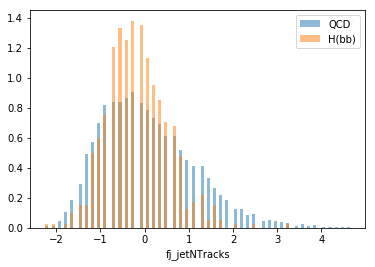

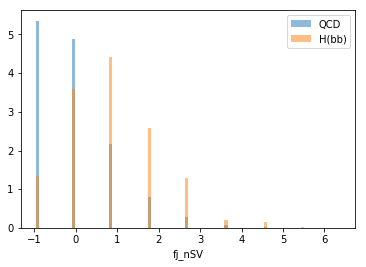

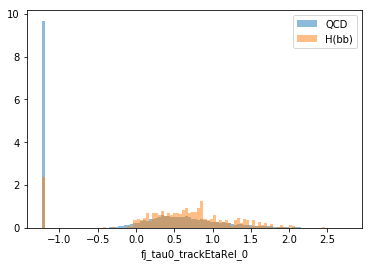

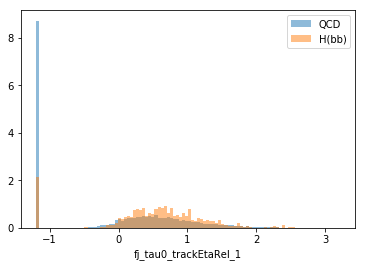

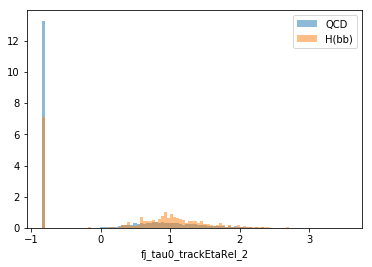

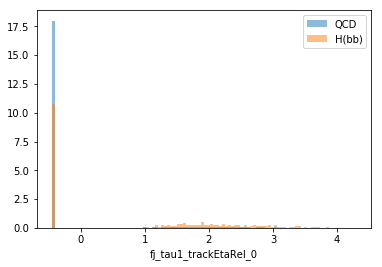

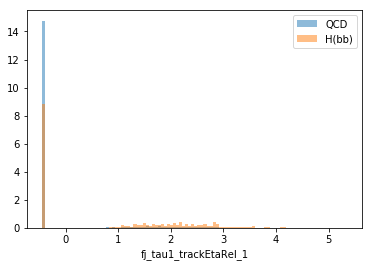

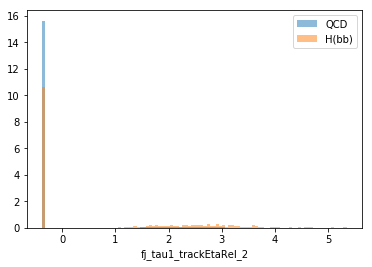

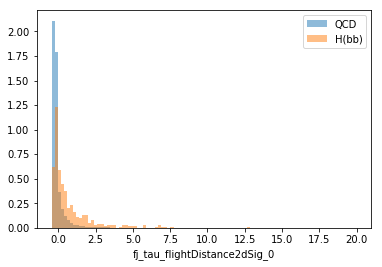

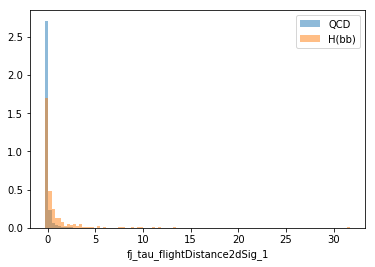

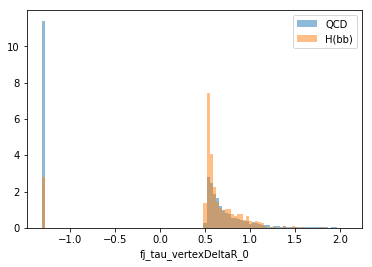

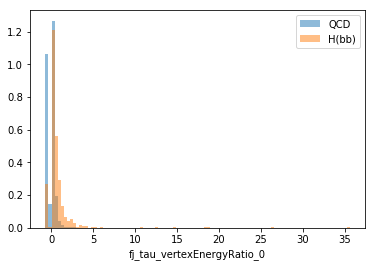

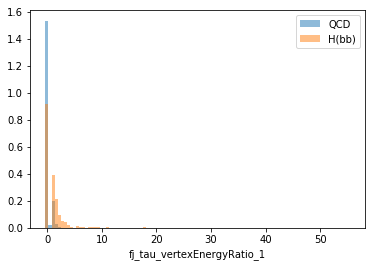

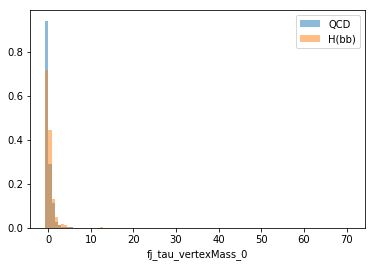

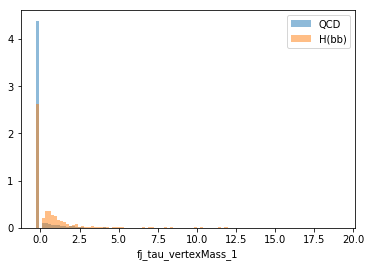

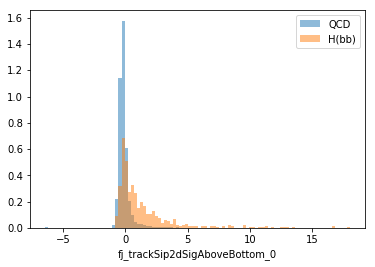

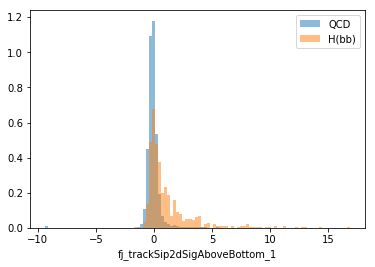

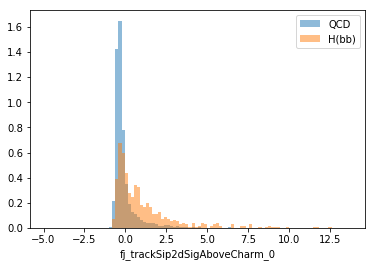

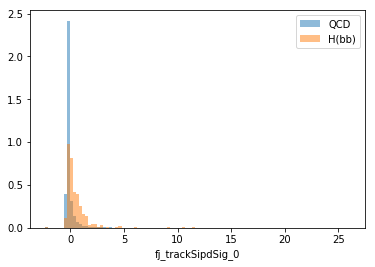

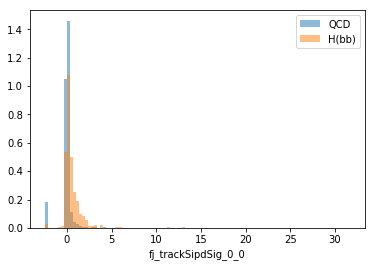

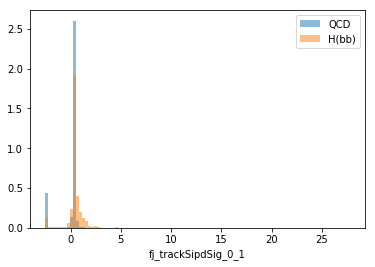

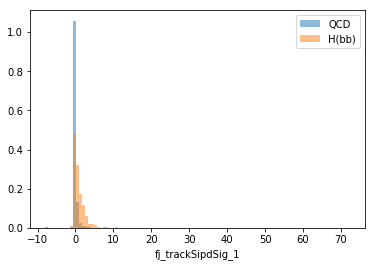

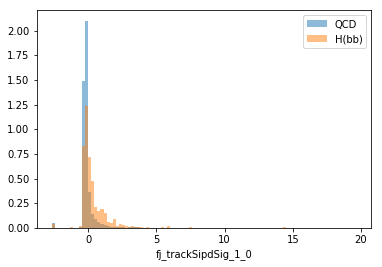

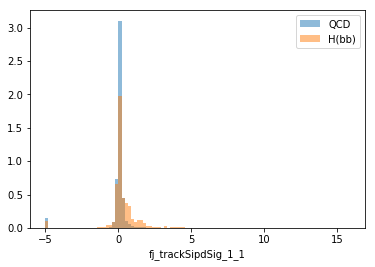

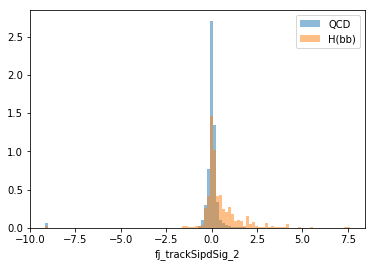

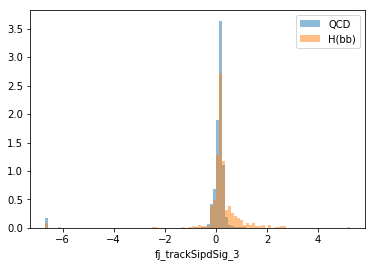

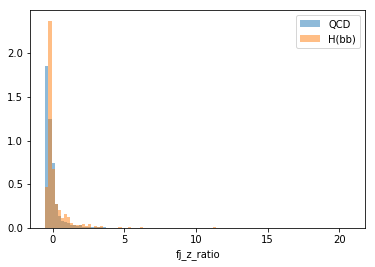

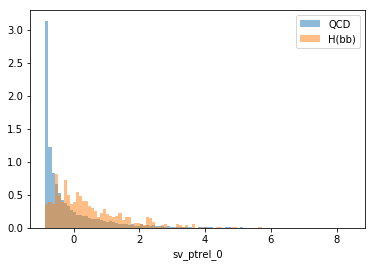

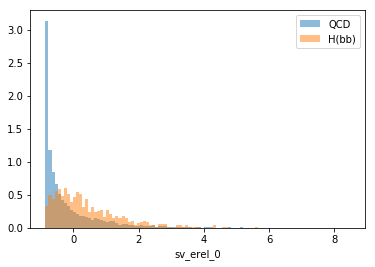

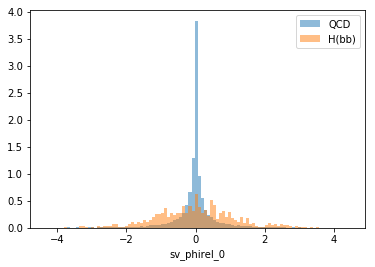

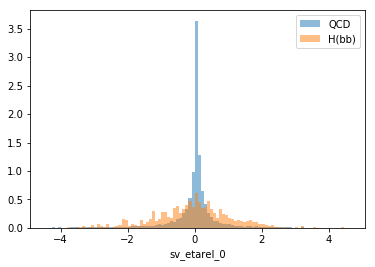

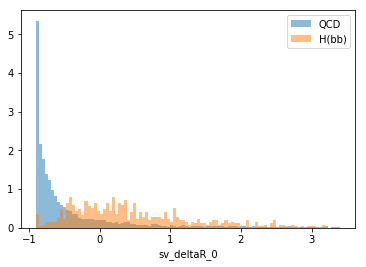

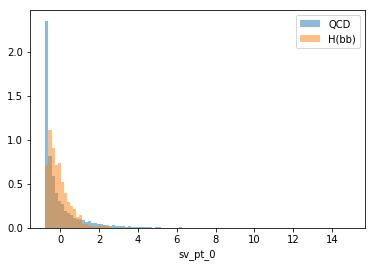

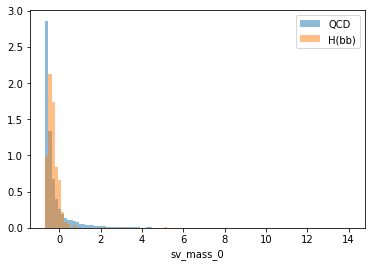

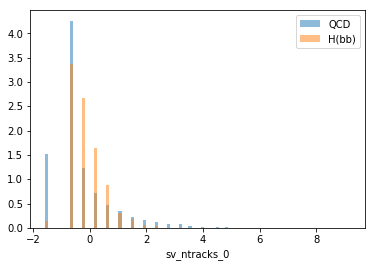

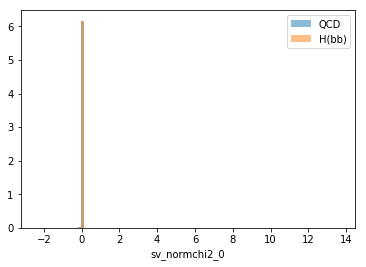

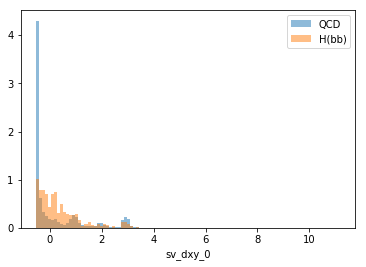

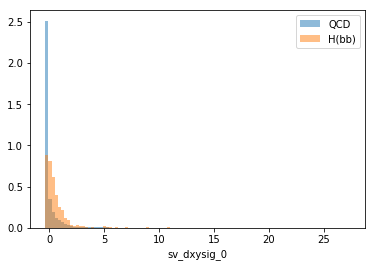

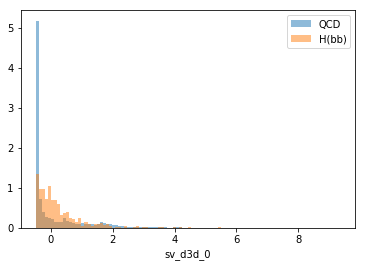

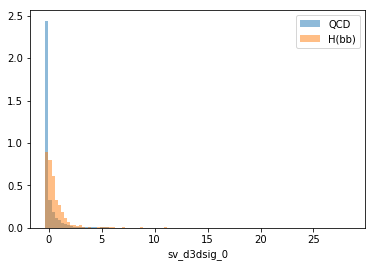

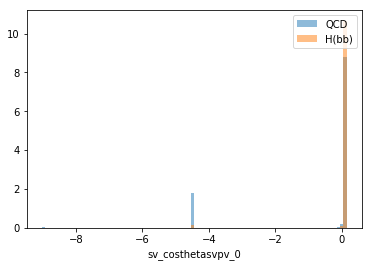

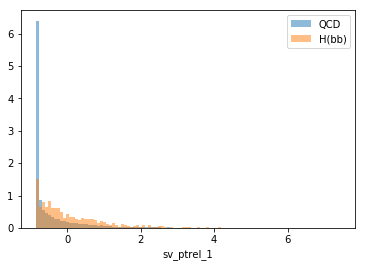

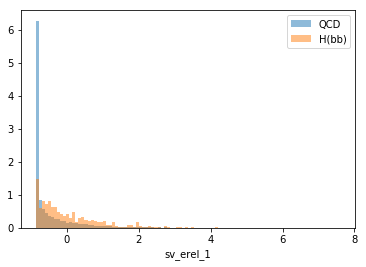

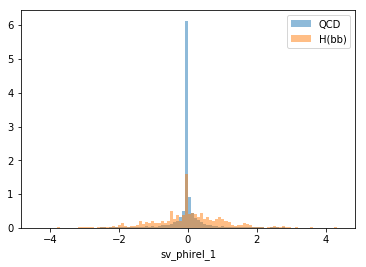

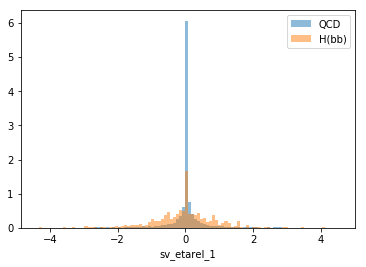

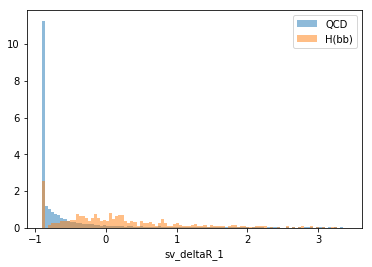

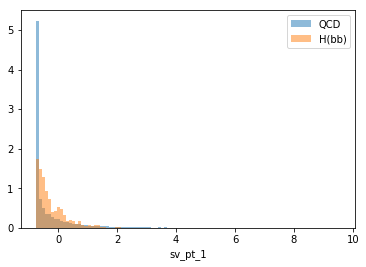

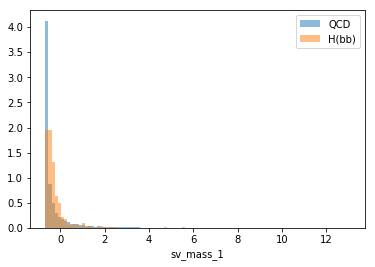

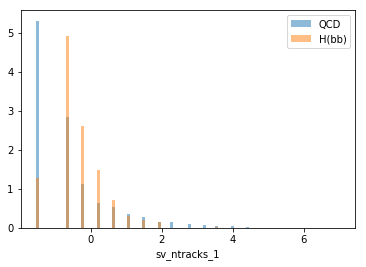

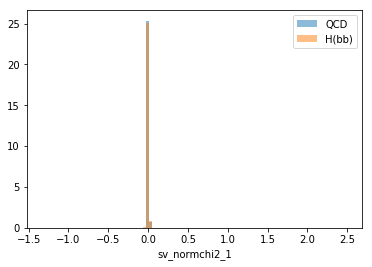

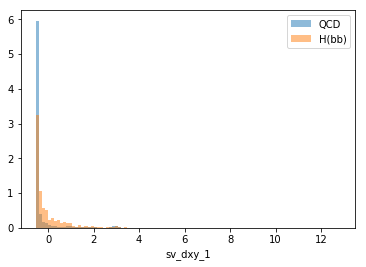

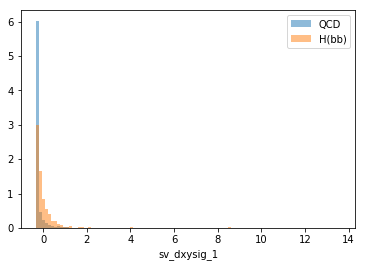

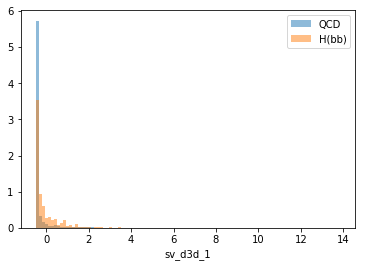

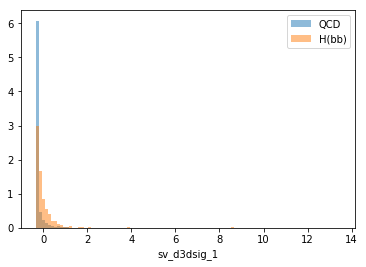

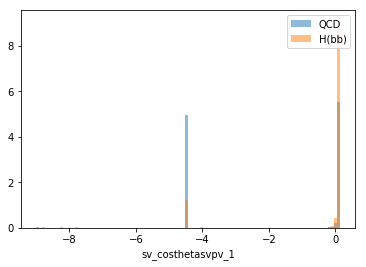

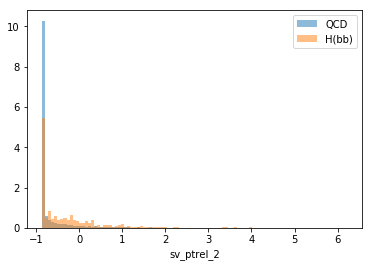

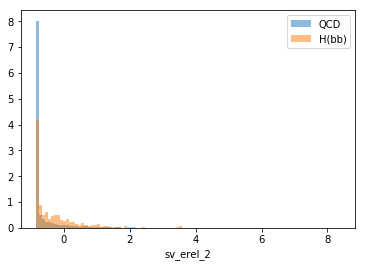

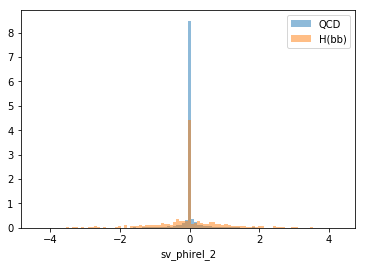

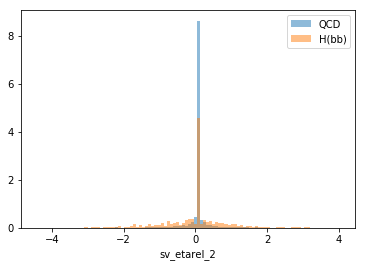

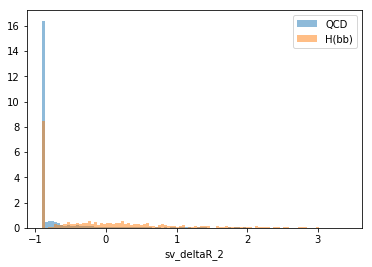

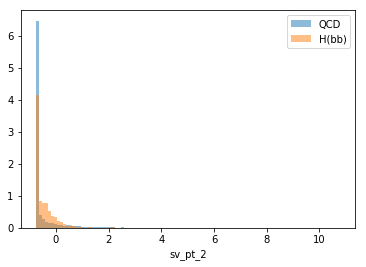

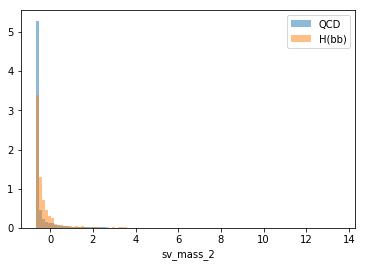

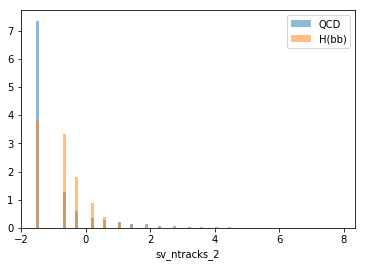

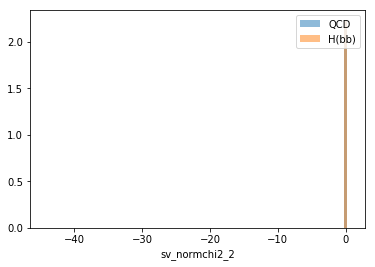

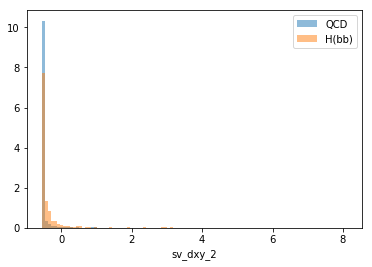

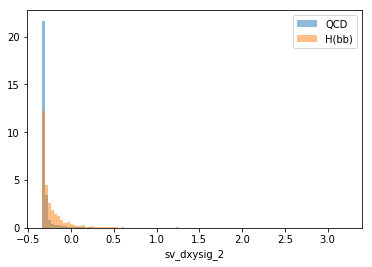

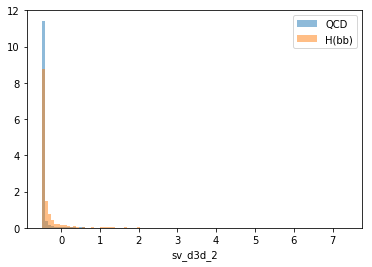

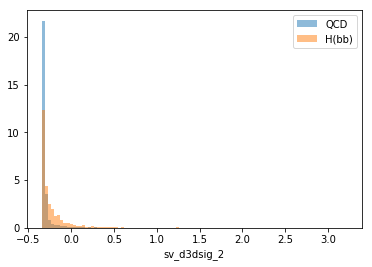

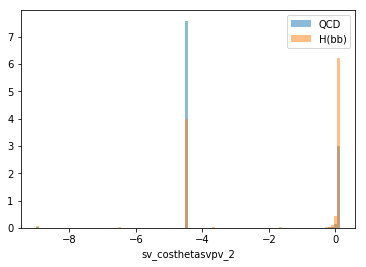

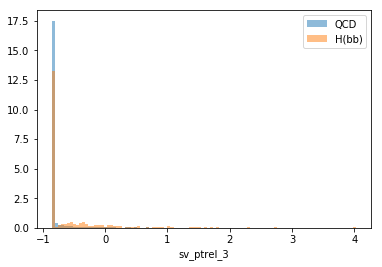

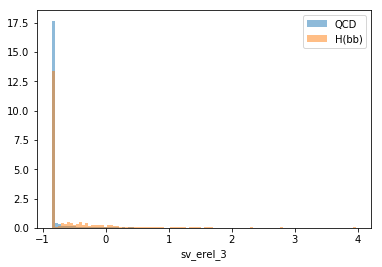

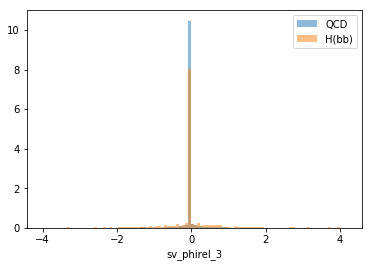

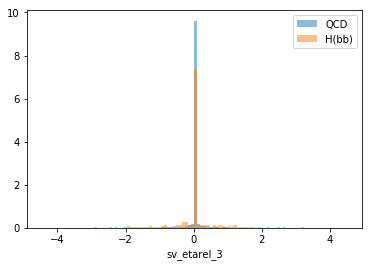

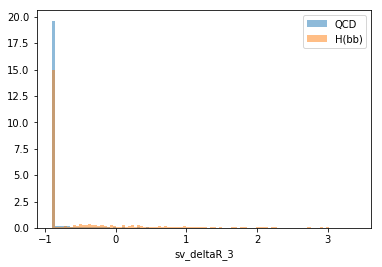

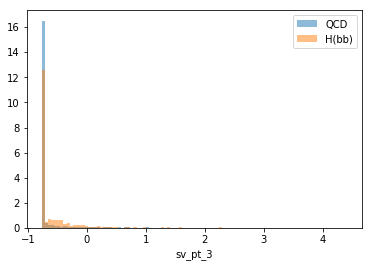

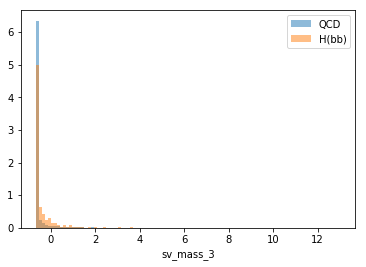

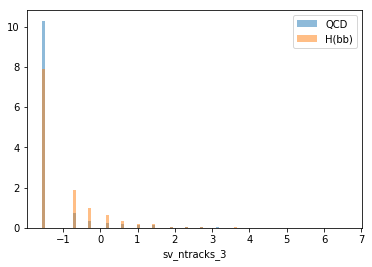

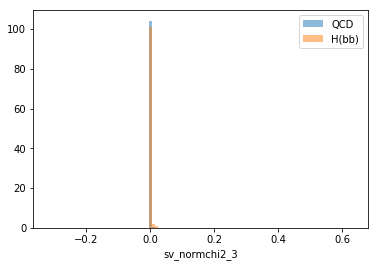

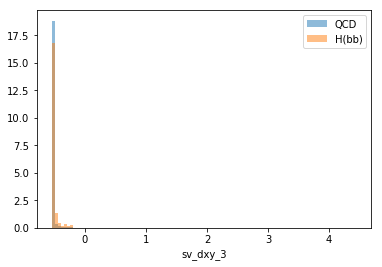

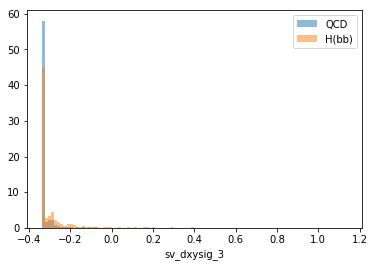

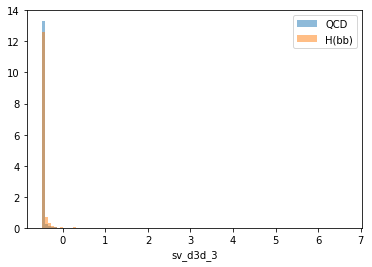

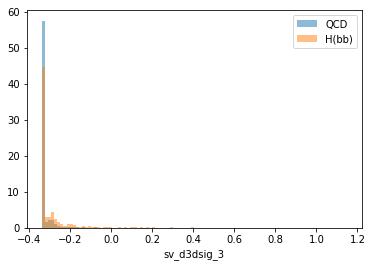

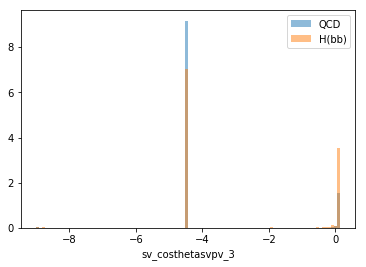

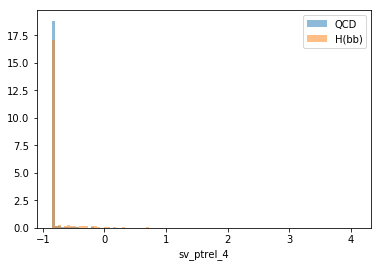

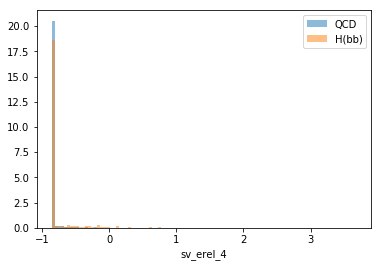

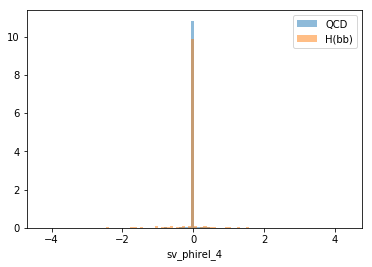

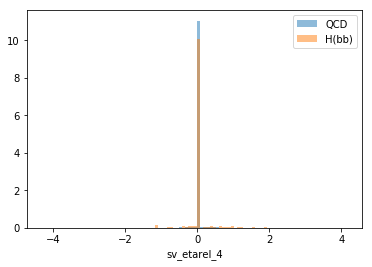

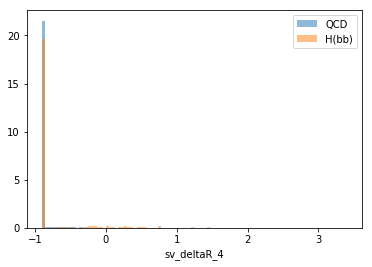

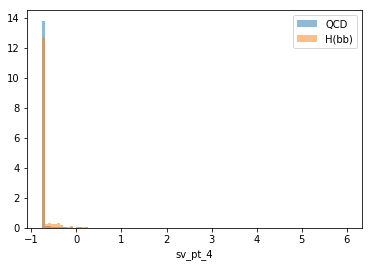

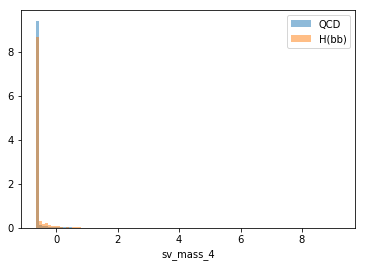

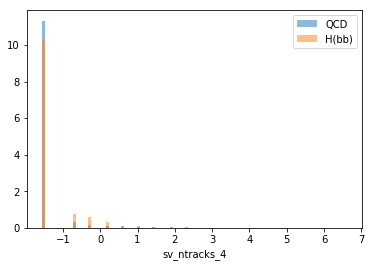

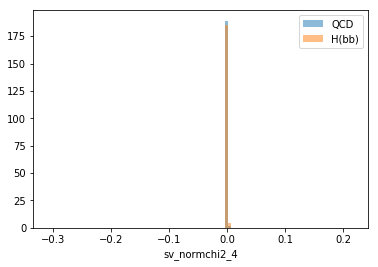

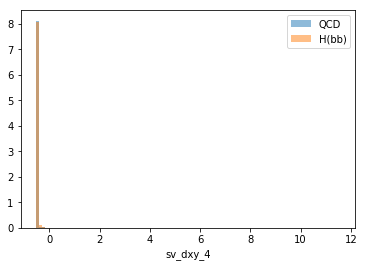

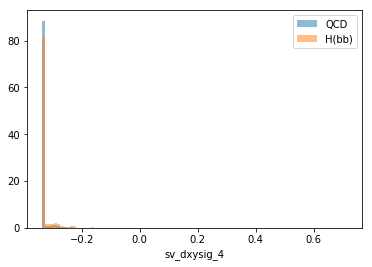

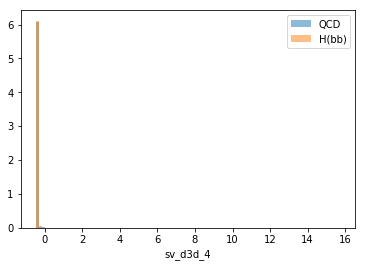

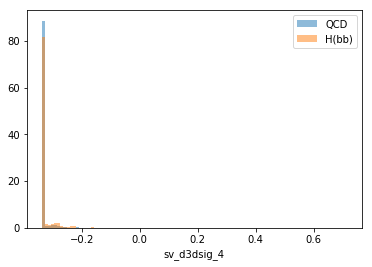

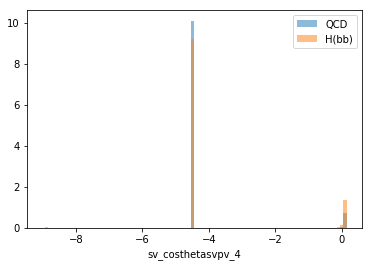

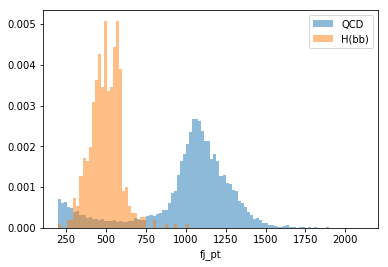

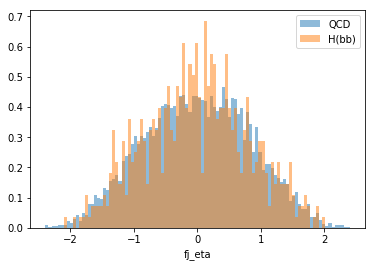

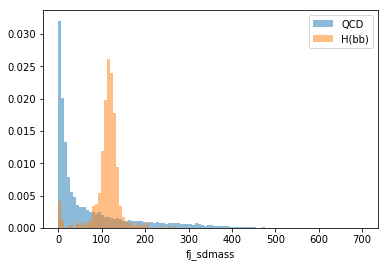

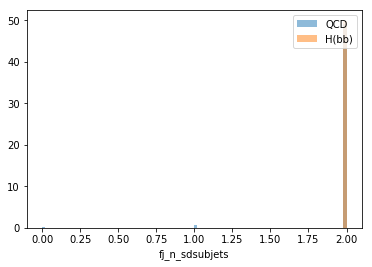

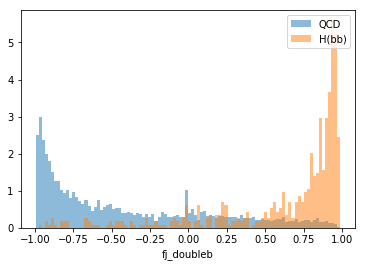

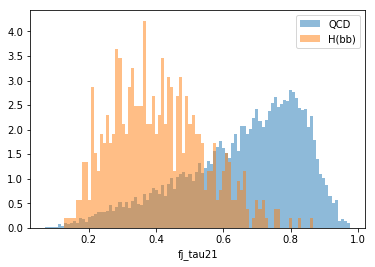

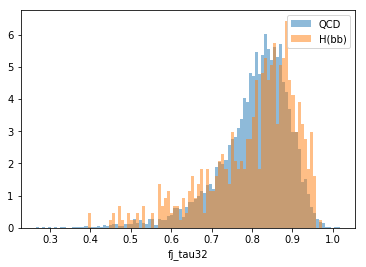

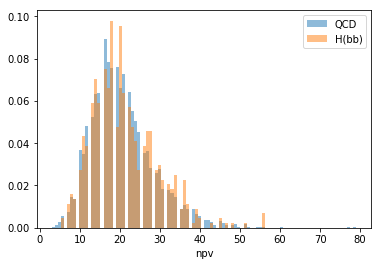

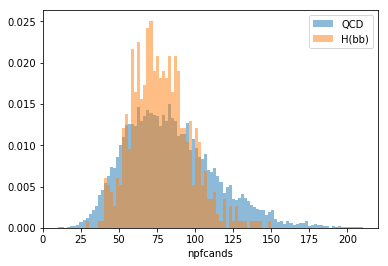

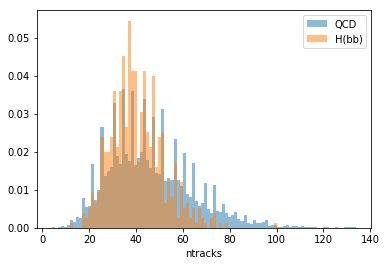

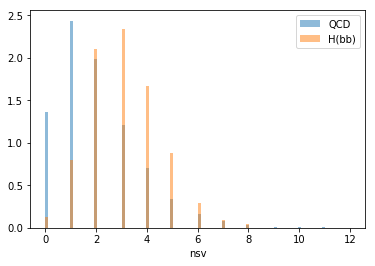

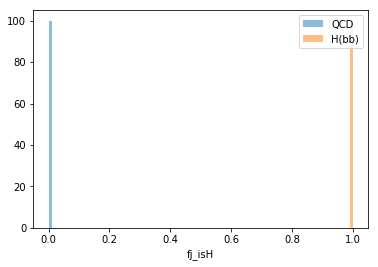

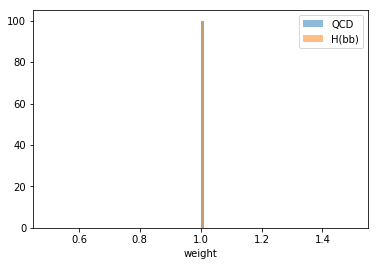

In [7]:
for col in df.columns:
    plt.figure()
    plt.hist(df[col], bins = 100, weights = 1-df['fj_isH'], alpha=0.5,normed=True,label='QCD')
    plt.hist(df[col], bins = 100, weights = df['fj_isH'], alpha=0.5,normed=True,label='H(bb)')
    plt.xlabel(col)
    plt.legend(loc='upper right')
    plt.savefig(outputDir+col+".pdf")